In [3]:
!pip install tensorflow


  Using cached tensorflow-2.19.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached ml_dtypes-0.5.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (21 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.0/645.0 MB 3.4 MB/s eta 0:00:0000:01m0:02m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 9.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 5.0 MB/s eta 0:00:00a 0:00:01m
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0


In [4]:

import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget

In [ ]:
# def get_img_array(img_path, size):
#     # `img` is a PIL image of size 224x224
#     img = keras.preprocessing.image.load_img(img_path, target_size=size)
#     # `array` is a float32 Numpy array of shape (224, 224, 3)
#     array = keras.preprocessing.image.img_to_array(img)
#     # We add a dimension to transform our array into a "batch"
#     # of size (1, 224, 224, 3)
#     array = np.expand_dims(array, axis=0)
#     return array


# def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
#     # First, we create a model that maps the input image to the activations
#     # of the last conv layer as well as the output predictions
#     grad_model = tf.keras.models.Model(
#         [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
#     )

#     # Then, we compute the gradient of the top predicted class for our input image
#     # with respect to the activations of the last conv layer
#     with tf.GradientTape() as tape:
#         last_conv_layer_output, preds = grad_model(img_array)
#         if pred_index is None:
#             pred_index = tf.argmax(preds[0])
#         class_channel = preds[:, pred_index]

#     # This is the gradient of the output neuron (top predicted or chosen)
#     # with regard to the output feature map of the last conv layer
#     grads = tape.gradient(class_channel, last_conv_layer_output)

#     # This is a vector where each entry is the mean intensity of the gradient
#     # over a specific feature map channel
#     pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

#     # We multiply each channel in the feature map array
#     # by "how important this channel is" with regard to the top predicted class
#     # then sum all the channels to obtain the heatmap class activation
#     last_conv_layer_output = last_conv_layer_output[0]
#     heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
#     heatmap = tf.squeeze(heatmap)

#     # For visualization purpose, we will also normalize the heatmap between 0 & 1
#     heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
#     return heatmap.numpy()

Predicted class: No Tumor


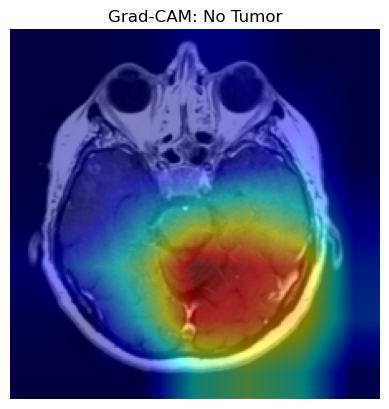

In [ ]:
# import torch
# import torch.nn as nn
# from torchvision import models, transforms
# from PIL import Image
# import matplotlib.pyplot as plt
# import numpy as np
# from pytorch_grad_cam import GradCAM
# from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
# from pytorch_grad_cam.utils.image import show_cam_on_image

# # --- Step 1: Load and preprocess image ---
# img_path = '/home/tanuj/Brain_MRI/brain_tumor_mri_dataset/Testing/pituitary/image(22).jpg'
# img = Image.open(img_path).convert('RGB')

# transform = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor(),
#     transforms.Normalize([0.485, 0.456, 0.406], 
#                          [0.229, 0.224, 0.225])
# ])

# # Get tensor and batchify
# img_tensor = transform(img).unsqueeze(0)

# # For visualization
# img_for_vis = transforms.ToTensor()(transforms.Resize((224, 224))(img)).permute(1, 2, 0).numpy()
# img_for_vis = (img_for_vis - img_for_vis.min()) / (img_for_vis.max() - img_for_vis.min())

# # Device setup
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# img_tensor = img_tensor.to(device)

# # --- Step 2: Load model ---
# model = models.resnet50(pretrained=False)
# model.fc = nn.Linear(model.fc.in_features, 4)  # 4 classes
# model.load_state_dict(torch.load('/home/tanuj/Brain_MRI/brain_tumor_model.pth', map_location=device))
# model = model.to(device)
# model.eval()

# # --- Step 3: Predict ---
# with torch.no_grad():
#     outputs = model(img_tensor)
#     predicted_class = torch.argmax(outputs, dim=1).item()

# class_names = ["Glioma", "Meningioma", "Pituitary", "No Tumor"]
# print("Predicted class:", class_names[predicted_class])

# # --- Step 4: Grad-CAM ---
# target_layer = model.layer4[-1]  # Last convolutional block
# cam = GradCAM(model=model, target_layers=[target_layer])

# # Compute CAM
# grayscale_cam = cam(input_tensor=img_tensor, targets=[ClassifierOutputTarget(predicted_class)])
# grayscale_cam = grayscale_cam[0, :]  # Remove batch dim

# # Show CAM overlaid on image
# visualization = show_cam_on_image(img_for_vis, grayscale_cam, use_rgb=True)
# plt.imshow(visualization)
# plt.axis('off')
# plt.title(f"Grad-CAM: {class_names[predicted_class]}")
# plt.show()
